# **Food Image Dataset: On my Own**
## **Universidad Nacional de Colombia Sede Medellín**


## Análisis de imágenes en platos de comida típicos de Antioquía: un enfoque de visión por computadora para el conteo de carbohidratos en personas con diabetes mellitus

**Estudiante :** Andrés Felipe Jaramillo Tamayo.
**Identificación :** Cédula de Ciudadanía, 1.037.663.920

• **Director propuesto :** Ph.D. M.Sc. Juan David Ospina Arango.
**Departamento del director :** Ciencias de la Computación y la Decisión.
**Cédula :** 71364925
**Correo :** jdospina@unal.edu.co

• **Codirector propuesto # 1 :** Ph.D. M.Sc. Freddy Bolaños Martínez
**Departamento del codirector :** Energía Eléctrica y Automática.
**Cédula :** 94511803
**Cédula :** fbolanosm@unal.edu.co

• **Codirectora propuesta # 2 :** Ph.D. M.Sc. Laura Lema Pérez.
**Institución de la codirectora :** Universidad Noruega de Ciencia y Tecnología
(NTNU) / Departamento de Ingeniería Cibernética.
**Cédula :** 1128421450
**Cédula :** llemap@unal.edu.co

• **Codirectora propuesta # 3 :** Ph.D. M.Sc. Lina María Gómez E.
**Departamento de la codirectora :** Departamento de Procesos y Energía
**Cédula :**
**Cédula :** limage@unal.edu.co




## **Justificación**

### **¿Qué?**
El problema central que se abordará es la ineficacia del enfoque tradicional de control de la ingesta de carbohidratos mediante un diario en papel en el manejo de la diabetes mellitus en Antioquia. Específicamente, se destaca que este enfoque obsoleto y poco preciso dificulta el control nutricional de las personas con diabetes, aumenta el riesgo de complicaciones de salud y conlleva a costos médicos adicionales. Además, impacta negativamente en su vida social y emocional al limitar su participación en actividades sociales y su autonomía.



### **¿Para qué?**
Para abordar este problema, se propone la implementación de técnicas avanzadas, como el procesamiento de imágenes y el aprendizaje automático, con el objetivo de cuantificar los carbohidratos en los alimentos. La finalidad de esta propuesta es mejorar la precisión en la administración de insulina y el control glucémico de las personas con diabetes. En última instancia, se busca mitigar los efectos negativos del enfoque tradicional mencionado, mejorando la calidad de vida y la gestión de la salud de las personas afectadas por la diabetes en Antioquia.

### **¿Cómo?**

En este script, se usará un modelo de ML para demostrar la capacidad de los modelos de Deep Learning son los más capacitados para resolver el problema de segmentación semántica.


In [ ]:
!python --version

Python 3.11.12


Instalación de paquetes haciendo de uso de pip como instalador

In [1]:
!pip install cython pycocotools matplotlib numpy scikit-image opencv-python-headless scikit-learn tabulate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.7/458.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 18.0 MB/s eta 0:00:00


## **Librerías**

Evitar salida de Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Librerías
try:

  import random
  import gc
  import copy
  import matplotlib.pyplot as plt
  import time
  import os
  import numpy as np
  import json
  import skimage.io
  import cv2
  import shutil

  from pycocotools.coco import COCO
  from matplotlib.colors import ListedColormap
  from PIL import Image
  from skimage.exposure import equalize_hist, adjust_gamma
  from skimage.feature import canny
  from skimage.color import rgb2gray
  from tabulate import tabulate
  from collections import defaultdict
  from skimage import exposure, transform
  from sklearn.cluster import KMeans
  import joblib
  from skimage.color import rgb2gray

  # Sklearn
  from sklearn.model_selection import train_test_split
  from sklearn.utils import shuffle
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.metrics import classification_report
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  from sklearn.metrics import accuracy_score
  from sklearn import svm

except ImportError as e:
  print(f"ImportError: {e}")

## **Descripción de datos**

### **Lectura de los datos desde Google Drive**

In [4]:
# Montar Google Drive en Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




### **Rutas de uso general**

In [5]:
# Rutas de uso general
RUTA_PPAL = "/content/drive/MyDrive"
training_path = os.path.join(RUTA_PPAL, "DatasetModelCarbs/Data/train")
validation_path = os.path.join(RUTA_PPAL, "DatasetModelCarbs/Data/val")
testing_path = os.path.join(RUTA_PPAL, "DatasetModelCarbs/Data/test")

### **Análisis de los datos**

Cantidad total de imágenes por formato en la carpeta Training:
Formato jpg: 959


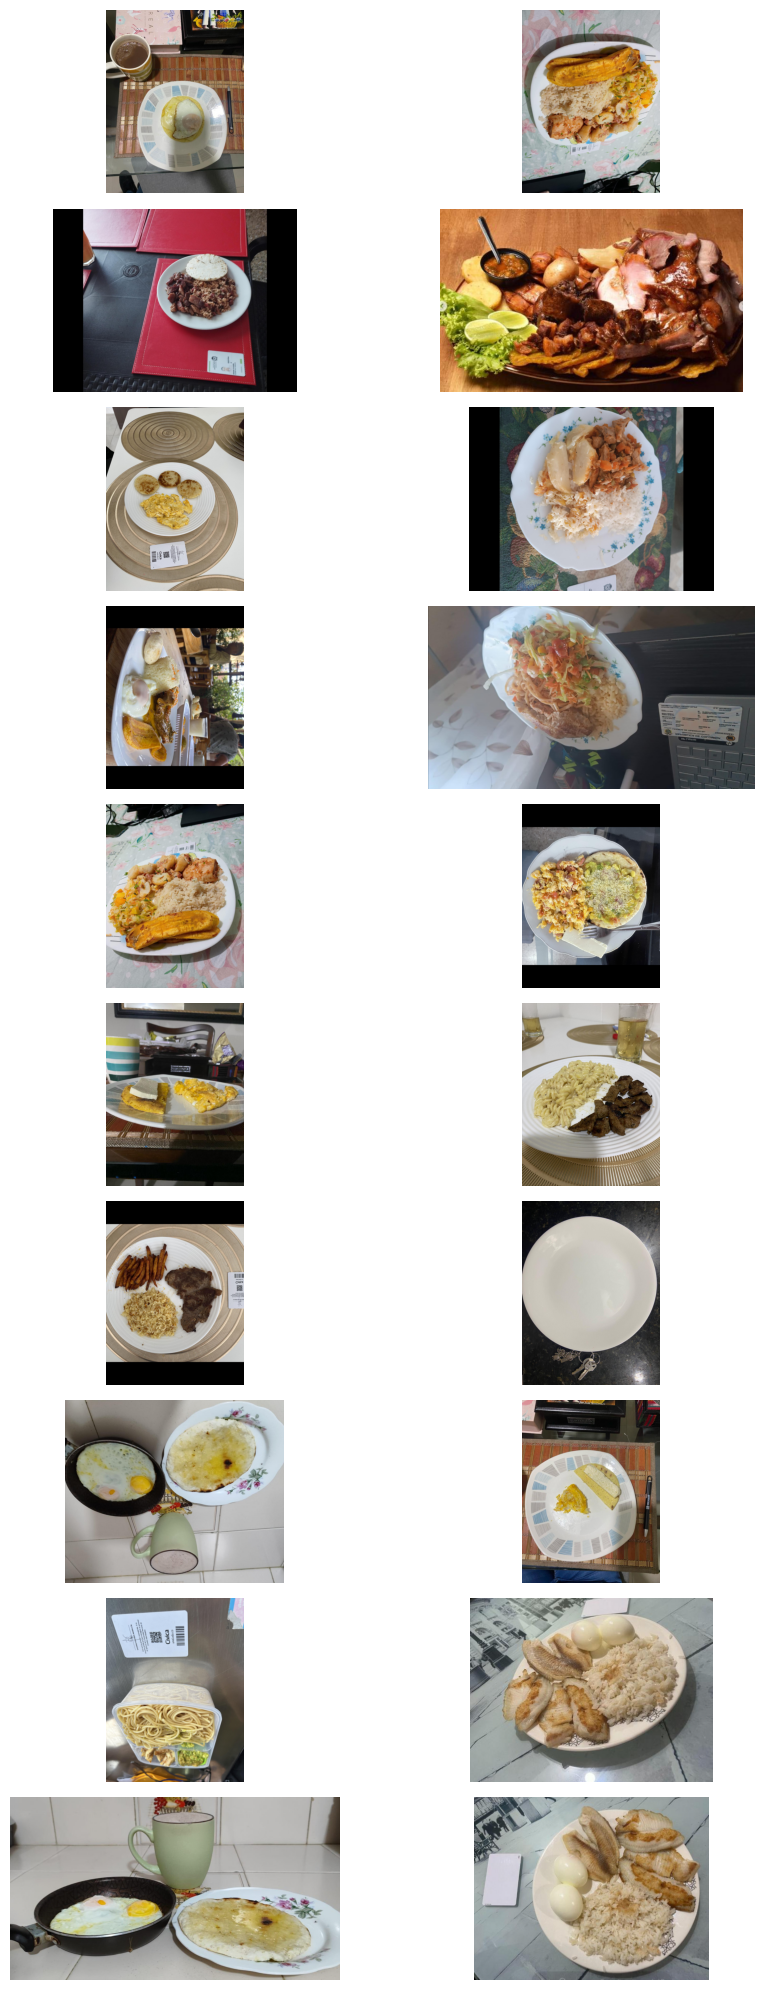

Total de imágenes en toda la carpeta: 1372


In [6]:
# Obtener lista de archivos de imagen en la carpeta training_path
lista_archivos_training = os.listdir(training_path)
archivos_de_imagen_training = [archivo for archivo in lista_archivos_training if archivo.lower().endswith((".png", ".jpg", ".jpeg"))]

# Obtener lista de archivos de imagen en la carpeta validation_path
lista_archivos_validation = os.listdir(validation_path)
archivos_de_imagen_validation = [archivo for archivo in lista_archivos_validation if archivo.lower().endswith((".png", ".jpg", ".jpeg"))]

# Obtener lista de archivos de imagen en la carpeta testing_path
lista_archivos_testing = os.listdir(testing_path)
archivos_de_imagen_testing = [archivo for archivo in lista_archivos_testing if archivo.lower().endswith((".png", ".jpg", ".jpeg"))]

# Sumar cantidad de archivos de imagen en cada carpeta
total_archivos_training = len(archivos_de_imagen_training)
total_archivos_validation = len(archivos_de_imagen_validation)
total_archivos_testing = len(archivos_de_imagen_testing)

# Contar la cantidad total de imágenes por formato en toda la carpeta
contador_formato_total = defaultdict(int)

for archivo in archivos_de_imagen_training:
    formato = archivo.split(".")[-1].lower()
    contador_formato_total[formato] += 1

# Imprimir la cantidad total de imágenes por formato en toda la carpeta
print("Cantidad total de imágenes por formato en la carpeta Training:")

for formato, cantidad in contador_formato_total.items():
    print(f"Formato {formato}: {cantidad}")

# Seleccionar 20 imagenes random
random_images = random.sample(archivos_de_imagen_training, 20)

# Crea una figura con 10 filas y 2 columnas para mostrar las imágenes
fig, axs = plt.subplots(10, 2, figsize=(10, 20))

# Modifica la matriz de ejes para iterar sobre ella.
axs = axs.flatten()

# Itera sobre las imagenes y las grafica
for i, image_name in enumerate(random_images):
    image_path = os.path.join(training_path, image_name)
    image = skimage.io.imread(image_path)
    axs[i].imshow(image)
    axs[i].axis("off")

# Ajusta el diseño y espaciado del gráfico
plt.tight_layout()

# Muestra la imagen
plt.show()

# Imprimir el total de imágenes en toda la carpeta
total_imagenes = total_archivos_training + total_archivos_validation + total_archivos_testing
print(f"Total de imágenes en toda la carpeta: {total_imagenes}")

**ANALITICA DESCRIPTIVA DE LAS CLASES**.


+---------------+------------+
| Clase         |   Cantidad |
+===============+============+
| arroz         |        749 |
+---------------+------------+
| tag 4         |        688 |
+---------------+------------+
| tag3          |        391 |
+---------------+------------+
| platano       |        358 |
+---------------+------------+
| papa comun    |        290 |
+---------------+------------+
| papas fritas  |        216 |
+---------------+------------+
| arepa paisa   |        125 |
+---------------+------------+
| tag 6         |        122 |
+---------------+------------+
| arepamaiz     |        119 |
+---------------+------------+
| arepapequena  |        102 |
+---------------+------------+
| pan tajado    |         86 |
+---------------+------------+
| frijoles      |         76 |
+---------------+------------+
| tag 7         |         72 |
+---------------+------------+
| yuca          |         71 |
+---------------+------------+
| lentejas      |         57 |
+-------

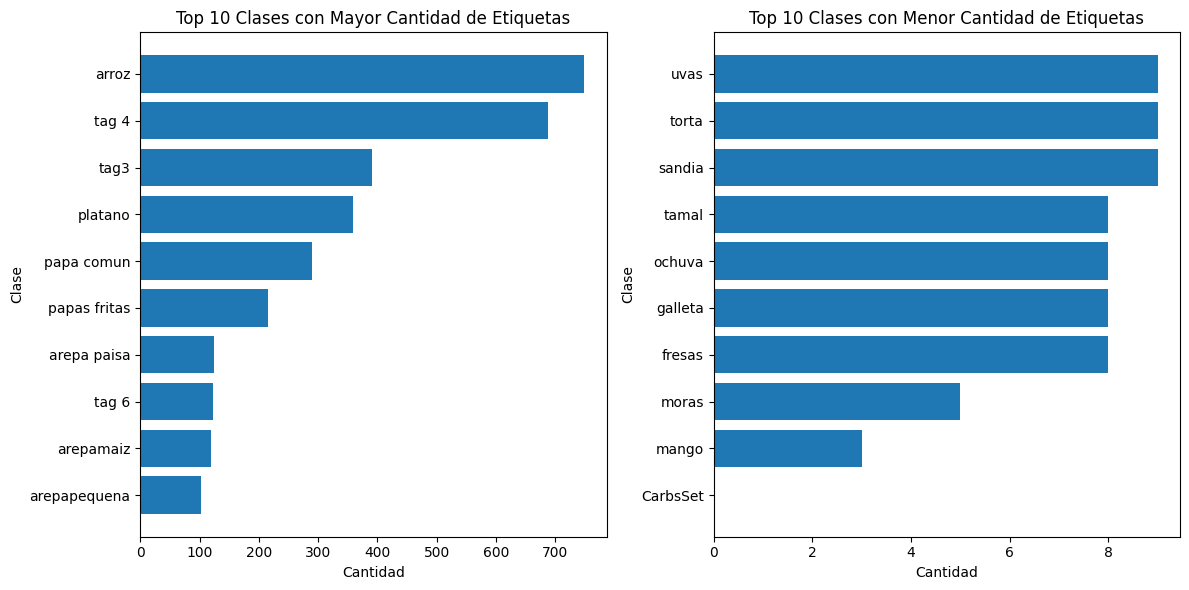

In [7]:
# Ruta de archivo .coco
file_path = os.path.join(RUTA_PPAL, "DatasetModelCarbs/_annotations.coco.json")

# Leer archivo en ruta especificada
with open(file_path, "r") as file:
    data = json.load(file)

# Crear un diccionario para contar las etiquetas y su respectiva cantidad
label_counts = {}
for category in data["categories"]:
    label_counts[category["name"]] = 0

# Contar la cantidad de etiquetas en el archivo
for annotation in data["annotations"]:
    label_counts[data["categories"][annotation["category_id"]]["name"]] += 1

# Ordenar las etiquetas por cantidad descendente
sorted_labels = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

# Crear una tabla con las etiquetas y su cantidad
table = []
for label, count in sorted_labels:
    table.append([label, count])

# Imprimir la tabla de etiquetas y su cantidad
print(tabulate(table, headers=["Clase", "Cantidad"], tablefmt="grid"))

average_labels = sum(label_counts.values()) / len(label_counts)
print(f"Promedio de número de etiquetas por clase: {average_labels}")

# Mostrar top 5 clases con menos etiquetas
sorted_labels = sorted(label_counts.items(), key=lambda x: x[1])
print("Top 5, clases con menos etiquetas:")

for label, count in sorted_labels[:5]:
    print(f"Clase: {label}, Cantidad: {count}")

# Calcula el número de clases en el archivo
total_classes = len(data["categories"])

# Imprimir el número total de clases
print(f"Numero total de clases: {total_classes}")

# Crea lista de nombres de clases
class_names = [category["name"] for category in data["categories"]]

# Cantidad por clase
class_counts = [label_counts[class_name] for class_name in class_names]

# Obtener las 10 clases con menor cantidad de etiquetas
top_10_classes = sorted_labels[-10:]
top_10_class_names = [label for label, _ in top_10_classes]
top_10_class_counts = [count for _, count in top_10_classes]

# Obtener las 10 clases con menor cantidad de etiquetas
bottom_10_classes = sorted_labels[:10]
bottom_10_class_names = [label for label, _ in bottom_10_classes]
bottom_10_class_counts = [count for _, count in bottom_10_classes]

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Graficar las 10 clases con mayor cantidad de etiquetas
axs[0].barh(top_10_class_names, top_10_class_counts)
axs[0].set_title("Top 10 Clases con Mayor Cantidad de Etiquetas")
axs[0].set_xlabel("Cantidad")
axs[0].set_ylabel("Clase")

# Graficar las 10 clases con Menor cantidad de etiquetas
axs[1].barh(bottom_10_class_names, bottom_10_class_counts)
axs[1].set_title("Top 10 Clases con Menor Cantidad de Etiquetas")
axs[1].set_xlabel("Cantidad")
axs[1].set_ylabel("Clase")

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


## **Preprocesamiento del banco de imagénes**


Inicialmente se muestra el procesamiento, y después los datos son llevados a una función de python para procesar todo el conjunto de imágenes.

El inicio del proceso implica la definición del tamaño de la imagen (dim). Posteriormente, se procede a cargar la imagen y aplicar una operación de redimensionamiento para estandarizar todas las imágenes en el conjunto.

In [8]:
# Selecciona un índice aleatorio dentro del rango de las imágenes de entrenamiento
i_random = np.random.randint(0, len(archivos_de_imagen_training))

# Define las dimensiones deseadas para la imagen resultante
dim = (512, 512)

# Carga la imagen correspondiente a la posición i en la lista de imágenes
image_path = os.path.join(training_path, archivos_de_imagen_training[i_random])
image = skimage.io.imread(image_path)

# Imprime la forma (dimensiones) de la imagen cargada
print(f"Dimensiones de la imagen original: {np.shape(image)}")

# Aplica una operación de redimensionamiento a la imagen utilizando las dimensiones definidas
# La interpolación INTER_AREA es utilizada para conservar la información de la imagen al cambiar su tamaño
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

# Imprime la forma (dimensiones) de la imagen redimensionada
print(f"Dimensiones de la imagen redimensionada: {np.shape(resized)}")

Dimensiones de la imagen original: (2048, 1536, 3)
Dimensiones de la imagen redimensionada: (512, 512, 3)


**Ecualización de Histograma**

Elegimos al azar una imagen de entrenamiento, la redimensionamos a un tamaño específico, mejoramos su contraste mediante la ecualización del histograma y, finalmente, exhibimos tanto la imagen original como la ecualizada.

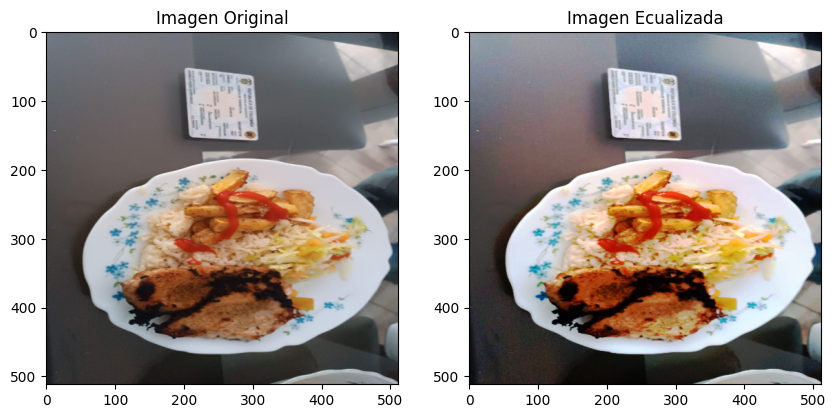

In [ ]:
# Ecualizar el histograma de la imagen
equalized_image = skimage.exposure.equalize_hist(resized)

# Crear una figura para mostrar la imagen original y la imagen ecualizada
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(resized, cmap="gray")
axes[0].set_title("Imagen Original")
axes[1].imshow(equalized_image, cmap="gray")
axes[1].set_title("Imagen Ecualizada")

# Mostrar las imágenes
plt.show()

**Corrección Gamma**

A continuación, se transforma una imagen previamente ecualizada a escala de grises y se le aplica una corrección gamma para afinar su brillo y contraste. Luego, ambas versiones, la imagen original en escala de grises y la imagen modificada con corrección gamma, son mostradas en una figura compuesta por dos subtramas para su visualización comparativa.

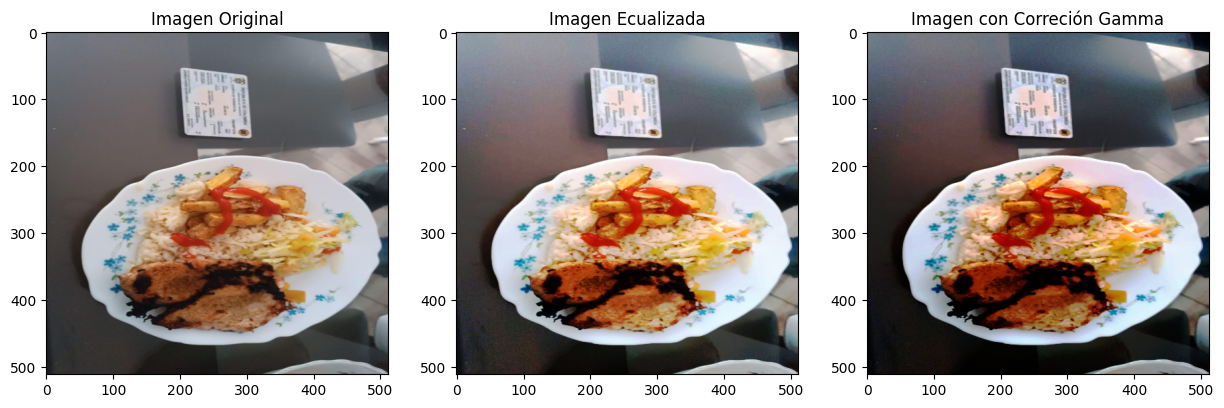

In [ ]:
# Aplicar la corrección gamma a la imagen ecualizada
gamma = 1.5  # Parametro de aumento de contraste
gamma_corrected_image = exposure.adjust_gamma(equalized_image, gamma)

# Crear una figura para mostrar la imagen original, la imagen ecualizada y la imagen corregida con gamma
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Mostrar la imagen original en la primera subtrama
axes[0].imshow(resized, cmap="gray")
axes[0].set_title("Imagen Original")

# Mostrar la imagen ecualizada en la segunda subtrama
axes[1].imshow(equalized_image, cmap="gray")
axes[1].set_title("Imagen Ecualizada")

# Mostrar la imagen corregida con gamma en la tercera subtrama
axes[2].imshow(gamma_corrected_image, cmap="gray")
axes[2].set_title("Imagen con Correción Gamma")

# Mostrar las imágenes
plt.show()

Acá observamos el histograma resultante:

(0.0, 1.0)

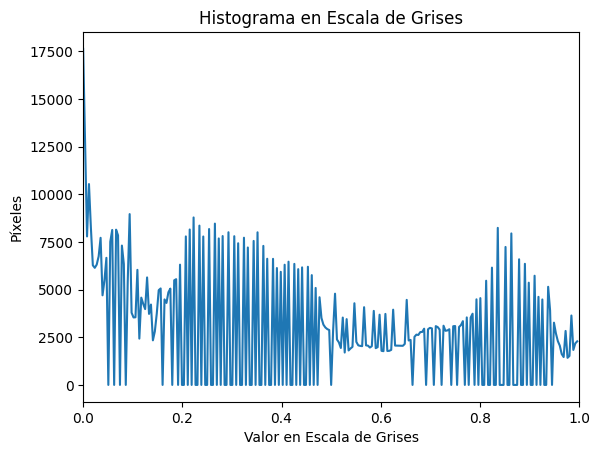

In [ ]:
# Se crea un histograma de la imagen ecualizada con corrección gamma
histogram, bin_edges = np.histogram(gamma_corrected_image, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Histograma en Escala de Grises")
plt.xlabel("Valor en Escala de Grises")
plt.ylabel("Píxeles")
plt.xlim(0, 1.0)

#### **Extracción de características**

Modelo de Segmentación de Bordes de Canny

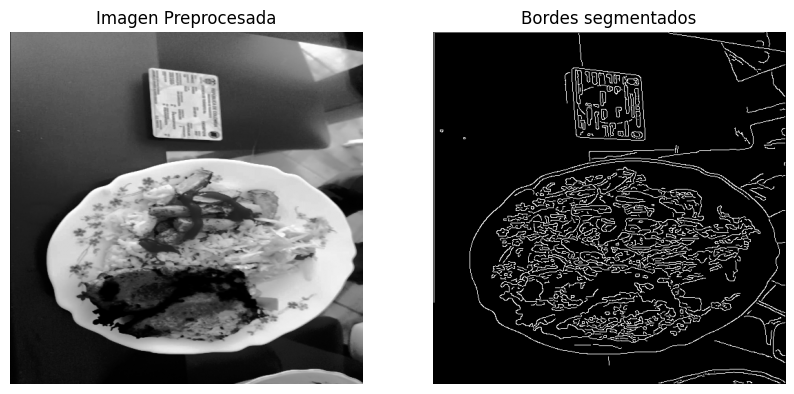

In [ ]:
# Aplica el modelo de segmentación por bordes de Canny
gray_image = rgb2gray(gamma_corrected_image)

edges = canny(gray_image)

# Graficar la imagen preprocesada y los bordes segmentados
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray_image, cmap="gray")
ax[0].set_title("Imagen Preprocesada")
ax[0].axis("off")
ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Bordes segmentados")
ax[1].axis("off")

plt.show()

Obtención de Mascaras

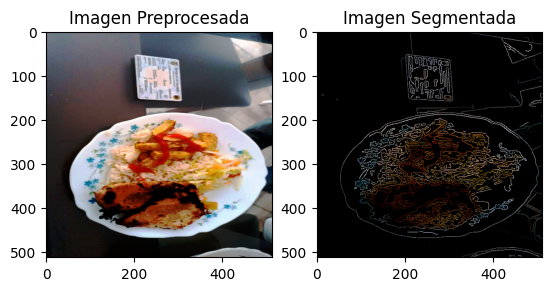

In [ ]:
# Extraer la mascara del modelo segmentado
mask_canny = edges != 0


def mask_aplication(image, binary_mask):
    """
    Aplica la máscara a la imagen preprocesada y la gráfica.
    """
    # Aplica la máscara a la imagen preprocesada
    segmented_image = np.copy(image)
    segmented_image[~binary_mask] = 0

    # Grafica la imagen procesada
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Imagen Preprocesada")

    # Grafica la imagen segmentada
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title("Imagen Segmentada")

    # Mostrar la gráfica
    plt.show()


mask_aplication(gamma_corrected_image, mask_canny)

Por último creamos una máscara, usando la técnica de umbralización Otsu.

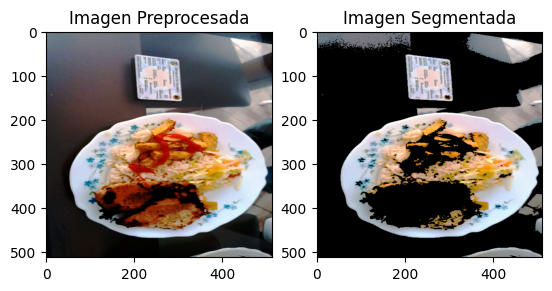

In [ ]:
# Crea la máscara binaria
t = skimage.filters.threshold_otsu(gray_image)
mask_otsu = gray_image > t

mask_aplication(gamma_corrected_image, mask_otsu)

Modelo de Segmentación por clustering de pixeles

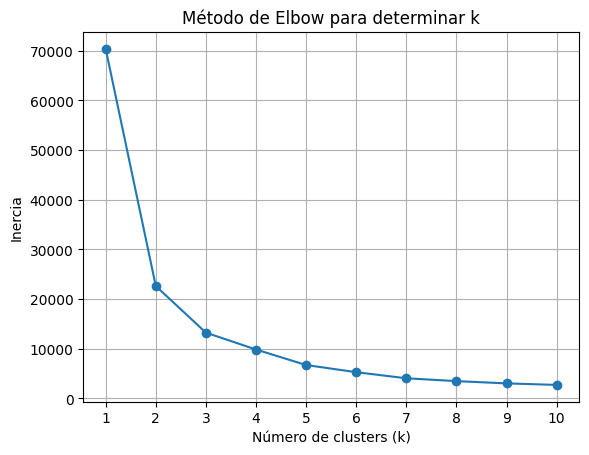

In [ ]:
# Cambiar la forma de la imagen a una matriz 2D
image_2d = gamma_corrected_image.reshape(-1, 3)

# Calcular la inercia para diferentes valores de k
inertia = []
k_values = range(1, 11)  # Prueba k desde 1 hasta 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(image_2d)
    inertia.append(kmeans.inertia_)

# Graficar el método de Elbow
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método de Elbow para determinar k")
plt.xticks(k_values)
plt.grid(True)
plt.show()

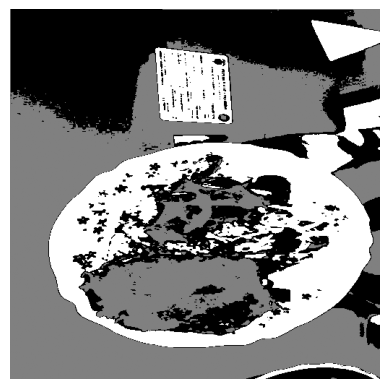

In [ ]:
# Se aplica el Clustering K-means
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(image_2d)

# Se redimenciona los labels a partir del tamaño de la img preprocesada
segmented_image_clustering = labels.reshape(gamma_corrected_image.shape[:2])

# Se muestra la imagen segmentada con el metodo de segmentación k-means
plt.imshow(segmented_image_clustering, cmap="gray")
plt.axis("off")
plt.show()

Se aplica la máscara a la imagén preprocesada

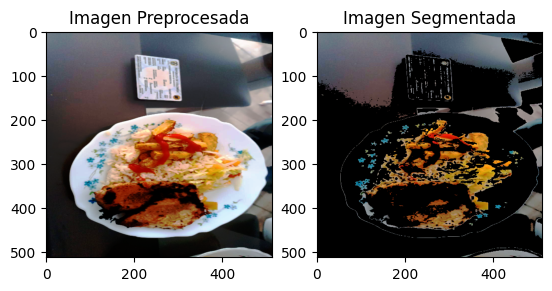

In [ ]:
mask_kmeans = segmented_image_clustering > 0
mask_kmeans = ~mask_kmeans
mask_aplication(gamma_corrected_image, mask_kmeans)

Finalmente, se pone a prueba la segmentación a partir del etiquetado inicial en las imagenes.

In [9]:
def create_mask(image_info, annotations, coco):
    """
    Crea la máscara de segmentación a partir de las anotaciones del archivo .coco.json
    """
    # Creamos una máscara vacía como un array numpy
    mask_np = np.zeros((image_info["height"], image_info["width"]), dtype=np.uint16)
    classes = [coco.loadCats(ann["category_id"])[0]["name"] for ann in annotations]

    for ann, class_name in zip(annotations, classes):
        if ann["image_id"] == image_info["id"]:
            # Extraemos el polígono de segmentación
            for seg in ann["segmentation"]:
                # Agrupamos los class_ids de las frutas en uno solo
                class_id = ann["category_id"]
                # Convertimos los polígonos en una máscara binaria y la agregamos a la máscara principal
                coordinates = np.array(seg).reshape((-1, 2))
                cv2.fillPoly(mask_np, [coordinates.astype(np.int32)], color=class_id)
    return mask_np, classes

In [10]:
coco_json_file = os.path.join(RUTA_PPAL, file_path)

In [11]:
# Inicializamos el objeto COCO
coco = COCO(coco_json_file)

# Obtenemos el nombre de archivo de la imagen de prueba
archivo_img = archivos_de_imagen_training[i_random]

# Inicializamos el ID de la imagen como None
img_id = None
# Iteramos sobre todas las imágenes cargadas
for img_iter in coco.dataset["images"]:
    # Verificamos si el nombre de archivo coincide
    if img_iter["file_name"] == archivo_img:
        img_id = img_iter["id"]
        break

# Cargamos la información de la imagen
img_info = coco.loadImgs(img_id)[0]


loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


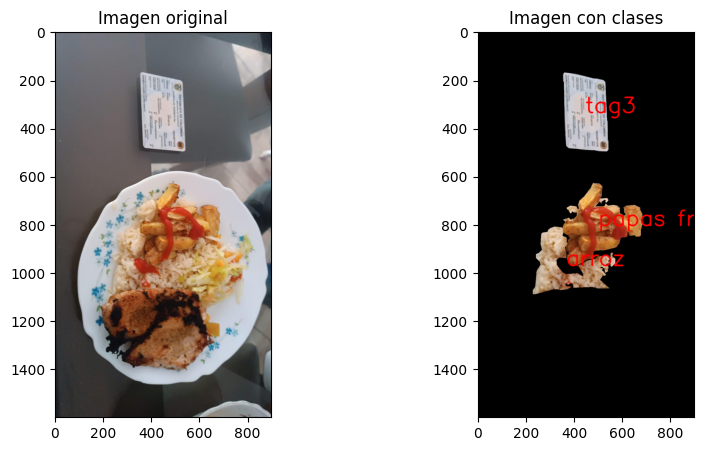

In [ ]:
# Cargamos las anotaciones de la imagen
annIds = coco.getAnnIds(imgIds=img_id)
annotations = coco.loadAnns(annIds)

# Creamos la máscara para la imagen actual
mask_np, classes = create_mask(img_info, annotations, coco)

# Obtenemos las dimensiones de la imagen original
img_height = img_info["height"]
img_width = img_info["width"]

# Creamos una nueva imagen con las mismas dimensiones que la original
imagee = image.copy()
maskk = mask_np > 0

# Aplicamos la máscara a la nueva imagen
imagee[~maskk] = 0

# Creamos una nueva imagen con las mismas dimensiones que la original
image_with_labels = imagee.copy()

# Iteramos sobre cada máscara y su clase correspondiente
for ann, class_name in zip(annotations, classes):
    if class_name:
        mask_coco, _  = create_mask(img_info, [ann], coco)
        mask = mask_coco > 0
        # Calculamos el centroide de la máscara
        centroid = np.mean(np.argwhere(mask), axis=0)
        # Posición para mostrar el nombre de la clase encima de la etiqueta
        text_position = (int(centroid[1]), int(centroid[0]) - 2)
        # Agregamos el nombre de la clase encima de la etiqueta en la imagen
        image_with_labels = cv2.putText(
            image_with_labels,
            class_name,
            text_position,
            cv2.FONT_HERSHEY_SIMPLEX,
            3,
            (255, 0, 0),
            6,
        )

# Se grafican ambas imagénes para ver la diferencia
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title("Imagen original")
axs[1].imshow(image_with_labels)
axs[1].set_title("Imagen con clases")
plt.show()

#### **Métricas de Segmentación**

Se aplicaron 5 métricas (Precisión, Recall, Accuracy, Dice, IoU) a diferentes modelos, utilizando como imagen real la etiquetada y como imagen predicha la obtenida por cada modelo. Valores cercanos a 1 indican mejor segmentación, mientras que valores cercanos a 0 indican segmentación deficiente.

In [ ]:
def precision_score_(groundtruth_mask, pred_mask):
    """
    Calcula la precisión entre dos máscaras binarias.
    Precision mide la proporción de píxeles correctamente detectados como
    verdaderos positivos respecto al total de píxeles predichos como positivos.
    """
    intersect = np.sum(pred_mask * groundtruth_mask)
    total_pixel_pred = np.sum(pred_mask)
    precision = np.mean(intersect / total_pixel_pred)
    return round(precision, 3)


def recall_score_(groundtruth_mask, pred_mask):
    """
    Calcula el recall entre dos máscaras binarias.
    Recall mide la proporción de píxeles correctamente detectados
    como verdaderos positivos respecto al total de píxeles de verdad.
    """
    intersect = np.sum(pred_mask * groundtruth_mask)
    total_pixel_truth = np.sum(groundtruth_mask)
    recall = np.mean(intersect / total_pixel_truth)
    return round(recall, 3)


def accuracy(groundtruth_mask, pred_mask):
    """
    Calcula la precisión (accuracy) entre dos máscaras binarias.
    Accuracy mide la proporción de píxeles correctamente clasificados
    (ya sea verdaderos positivos o verdaderos negativos) respecto al total de píxeles.
    """
    intersect = np.sum(pred_mask * groundtruth_mask)
    union = np.sum(pred_mask) + np.sum(groundtruth_mask) - intersect
    xor = np.sum(groundtruth_mask == pred_mask)
    acc = np.mean(xor / (union + xor - intersect))
    return round(acc, 3)


def dice_coef(groundtruth_mask, pred_mask):
    """
    Calcula el coeficiente de Dice entre dos máscaras binarias.
    El coeficiente de Dice es una medida de similitud que
    compara el área de superposición entre las máscaras con el
    área total de ambas máscaras.
    """
    intersect = np.sum(pred_mask * groundtruth_mask)
    total_sum = np.sum(pred_mask) + np.sum(groundtruth_mask)
    dice = np.mean(2 * intersect / total_sum)
    return round(dice, 3)


def iou(groundtruth_mask, pred_mask):
    """
    Calcula el índice de Jaccard (IoU) entre dos máscaras binarias.
    IoU mide la superposición entre dos máscaras como el
    área de intersección dividido por el área de unión.
    """
    intersect = np.sum(pred_mask * groundtruth_mask)
    union = np.sum(pred_mask) + np.sum(groundtruth_mask) - intersect
    iou = np.mean(intersect / union)
    return round(iou, 3)

maskk = transform.resize(maskk, dim, mode='constant', order=0)
# Calcular métricas para todas las máscaras
metrics_table = {
    "Máscara": ["Canny", "Otsu", "K-means"],
    "Precisión": [
        precision_score_(maskk, mask_canny),
        precision_score_(maskk, mask_otsu),
        precision_score_(maskk, mask_kmeans),
    ],
    "Recall": [
        recall_score_(maskk, mask_canny),
        recall_score_(maskk, mask_otsu),
        recall_score_(maskk, mask_kmeans),
    ],
    "Accuracy": [
        accuracy(maskk, mask_canny),
        accuracy(maskk, mask_otsu),
        accuracy(maskk, mask_kmeans),
    ],
    "Dice Coefficient": [
        dice_coef(maskk, mask_canny),
        dice_coef(maskk, mask_otsu),
        dice_coef(maskk, mask_kmeans),
    ],
    "IoU": [iou(maskk, mask_canny), iou(maskk, mask_otsu), iou(maskk, mask_kmeans)],
}

# Imprimir la tabla de métricas
print("Tabla de Métricas:")
for key, values in metrics_table.items():
    print(key + ":", values)

Tabla de Métricas:
Máscara: ['Canny', 'Otsu', 'K-means']
Precisión: [np.float64(0.28), np.float64(0.197), np.float64(0.126)]
Recall: [np.float64(0.191), np.float64(0.723), np.float64(0.374)]
Accuracy: [np.float64(0.855), np.float64(0.642), np.float64(0.643)]
Dice Coefficient: [np.float64(0.227), np.float64(0.31), np.float64(0.189)]
IoU: [np.float64(0.128), np.float64(0.183), np.float64(0.104)]


#### **Preprocesamiento general**

Al encapsular todos los pasos en una sola función definimos preprocessing(), la cual devuelve el tensor completamente listo para alimentar al modelo. En el documento explico por qué NO incluí ni ecualización de histograma ni corrección gamma: el preprocessor oficial del modelo en PyTorch ya determina la secuencia exacta de transformaciones (resize, normalización con medias y desviaciones de ImageNet, etc.). Introducir ajustes fotométricos adicionales rompería las estadísticas que la red espera y, por tanto, degradaría el rendimiento.

In [12]:
def preprocess_images(ruta_folder, file_name, coco):
    """
    Aplica el preprocesamiento a las imágenes y las máscaras.
    Carga de Imagen - Redimensionamiento
    """
    # Se crea la ruta para la imagen actual
    image_path = os.path.join(ruta_folder, file_name)

    # Cargar la imagen
    if image_path.endswith((".png", ".jpg", ".jpeg")):
        imagee = cv2.imread(image_path, cv2.IMREAD_COLOR)
    else:
        raise ValueError(f"Formato de archivo no soportado: {image_path}")

    # Aplicar redimensionamiento a la imagen
    dim = (512, 512)
    resized = cv2.resize(imagee, dim)

    mask_np = get_mask(ruta_folder, file_name, coco)
    mask_np = cv2.resize(mask_np, dim)
    maskk = mask_np > 0

    # Aplicamos la máscara a la nueva imagen
    resized[~maskk] = 0

    return resized

In [13]:
def get_mask(ruta_folder, file_name, coco):
    """
    Obtiene la máscara a partir del archivo de la imagén y el archivo .coco.json
    return (Ancho, Alto)
    """
    file_path = os.path.join(ruta_folder, file_name)
    original_image = cv2.imread(file_path)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

    # Inicializar el ID de la imagen como None
    img_id = None
    # Iterar sobre todas las imágenes cargadas
    for img_iter in coco.dataset["images"]:
        # Verificar si el nombre de archivo coincide
        if img_iter["file_name"] == file_name:
            img_id = img_iter["id"]
            break

    # Cargar la información de la imagen
    img_info = coco.loadImgs(img_id)[0]

    # Cargar las anotaciones de la imagenc
    annIds = coco.getAnnIds(imgIds=img_id)
    annotations = coco.loadAnns(annIds)

    # Creamos la máscara para la imagen actual
    mask_np, _ = create_mask(img_info, annotations, coco)
    return mask_np

In [ ]:
def visualize_mask(mask):
    plt.imshow(mask)
    plt.colorbar()
    plt.title("Máscara Base")
    plt.show()

loading annotations into memory...
Done (t=0.35s)
creating index...
index created!


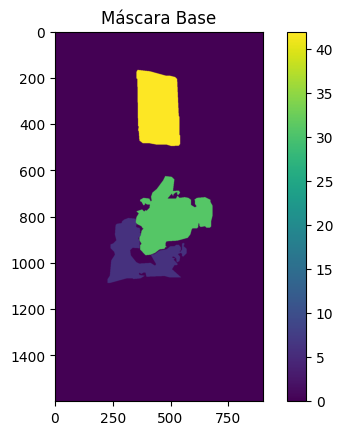

In [ ]:
file_name = archivos_de_imagen_training[i_random]
coco_json_file = os.path.join(RUTA_PPAL, file_path)
coco = COCO(coco_json_file)
mask_np = get_mask(training_path, file_name, coco)
visualize_mask(mask_np)

# Estructura de Carpetas para entrenar el modelo
- **Carbs_cuant_mhealth/**
    - **MODEL_CARBS.ipynb**: Este es el cuaderno de Jupyter para entrenar el modelo.
    - **Dataset/**
        - **train/**: Carpeta que contiene las imágenes de entrenamiento.
        - **test/**: Carpeta que contiene las imágenes de prueba.
        - **validation/**: Carpeta que contiene las imágenes de validación.
        - **_annotations.coco.json**: Archivo JSON que contiene las anotaciones en formato COCO.
    - **Drive/**



**Tipo de problema de analítica:**  Segmentación semántica.
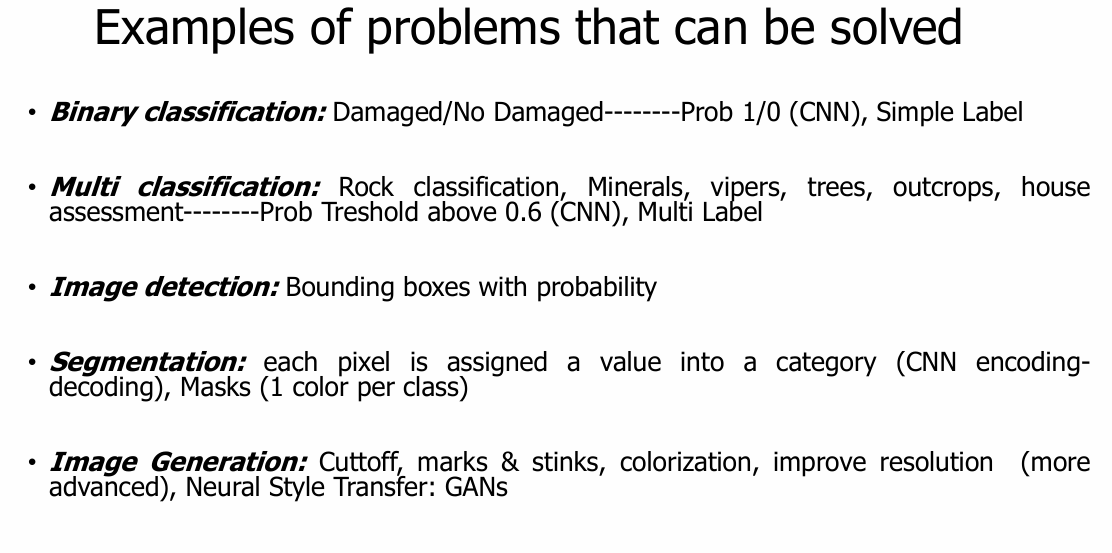

# Carga de datos preprocesados

Función Auxiliar para limpieza de carpeta con máscaras.

In [ ]:
def clear_folder(ruta_folder):
    """
    Limpia completamente el contenido de una carpeta, eliminando archivos y subcarpetas.

    Args:
        ruta_folder (str): Ruta de la carpeta a limpiar.
    """
    for filename in os.listdir(ruta_folder):
        file_path = os.path.join(ruta_folder, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                # Eliminar archivos o enlaces simbólicos
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                # Eliminar directorios completos
                shutil.rmtree(file_path)
        except Exception as e:
            print(f"No se pudo eliminar {file_path}. Error: {e}")

clear_folder(os.path.join(validation_path, "masks"))
clear_folder(os.path.join(testing_path, "masks"))
clear_folder(os.path.join(training_path, "masks"))

In [15]:
training_images = archivos_de_imagen_training
validation_images = archivos_de_imagen_validation
testing_images = archivos_de_imagen_testing

In [16]:
coco = COCO(coco_json_file)
training_images = archivos_de_imagen_training
N_CLASES = 49

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


In [22]:
ids_49      = sorted({ann["category_id"] for ann in coco.dataset["annotations"]})[:49]
id2label    = {orig: new for new, orig in enumerate(ids_49)}
label2id    = {v: k for k, v in id2label.items()}
N_CLASES    = len(id2label)

def extraer_clase(mask_np, fondo=0):
    # remapea cada pixel: ids fuera de la lista → fondo
    remapped = np.vectorize(lambda x: id2label.get(x, fondo))(mask_np)
    flat     = remapped.flatten()

    binc = np.bincount(flat, minlength=N_CLASES)
    binc[fondo] = 0
    return int(binc.argmax())

In [23]:
X_list = []
Y_list = []


for _file in training_images:
    # Se revisa la extensión del archivo
    if not(_file.endswith(".jpg")) or str(_file).endswith(("(1).jpg", "(2).jpg", "(3).jpg", "(4).jpg")):
        continue

    # Se carga la imagen

    image_resize = preprocess_images(training_path, _file, coco)
    class_id = extraer_clase(image_resize)

    X_list.append(image_resize.ravel())
    Y_list.append(class_id)

In [24]:
X = np.asarray(X_list, dtype=np.float32)
Y = np.asarray(Y_list, dtype=np.float32)

X, Y = shuffle(X, Y)

print("Forma de la matriz de características X")
print(X.shape)
print("\nForma de la matriz de etiquetas Y")
print(Y.shape)

class_types, counts = np.unique(Y, return_counts=True)

print("\nEtiquetas de las clases")
print(class_types)

Forma de la matriz de características X
(926, 786432)

Forma de la matriz de etiquetas Y
(926,)

Etiquetas de las clases
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.]


# Creación de subsets de train, test y validation

In [25]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, stratify=Y,
                                                    test_size=0.2,
                                                    random_state=42)
print("Forma de train_X")
print(train_X.shape)
print("\nForma de test_X")
print(test_X.shape)

Forma de train_X
(740, 786432)

Forma de test_X
(186, 786432)


Analisis del subset de entrenamiento y testeo

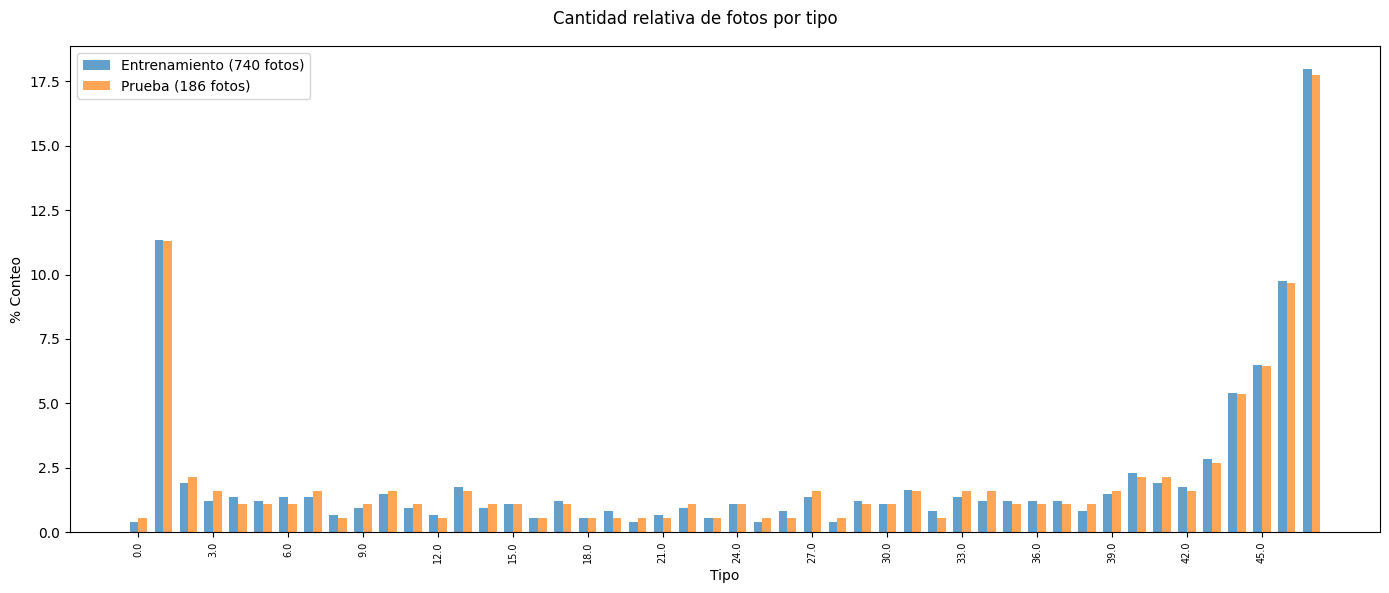

In [30]:
def plot_bar(y, loc='left', relative=True, step=3):
    width = 0.35
    n = -0.5 if loc == 'left' else 0.5

    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique  = unique[sorted_index]
    counts  = counts[sorted_index]

    if relative:
        counts = 100 * counts / len(y)
        ylabel_text = '% Conteo'
    else:
        ylabel_text = 'Conteo'

    xtemp = np.arange(len(unique))
    plt.bar(xtemp + n*width, counts, width=width, alpha=.7)

    # --------- eje X legible ------------
    plt.xticks(xtemp[::step], unique[::step], rotation=90, fontsize=7)
    # -------------------------------------

    plt.xlabel('Tipo')
    plt.ylabel(ylabel_text)

plt.figure(figsize=(14,6))
plt.suptitle('Cantidad relativa de fotos por tipo')

plot_bar(train_Y, loc='left',  step=3)
plot_bar(test_Y,  loc='right', step=3)

plt.legend([
    f'Entrenamiento ({len(train_Y)} fotos)',
    f'Prueba ({len(test_Y)} fotos)'
])
plt.tight_layout()
plt.show()

# 📌 SVM Lineal (Scikit-Learn)

- **Kernel**: `linear`  
- **C**: 1 → controla el trade-off margen / errores.  
- **Entrenamiento por lotes** (`batch_size = 100`): recorre datos, llama `fit` en cada lote.  
- **Predicción por lotes** para ahorrar memoria.

In [27]:
# Hiperparámetros del modelo SVM lineal
kernel = 'linear'
C = 1
batch_size = 100  # Tamaño del lote

# Se crea un clasificador SVM lineal
svm_lin = svm.SVC(kernel=kernel, C=C)

# Se dividen los datos de entrenamiento en lotes
num_samples = len(train_X)
for i in range(0, num_samples, batch_size):
    start = i
    end = min(i + batch_size, num_samples)

    # Se obtiene el lote actual
    batch_X = train_X[start:end]
    batch_Y = train_Y[start:end]

    # Se entrena el modelo SVM con el lote actual
    svm_lin.fit(batch_X, batch_Y)

# Se realizan predicciones en los datos de prueba
y_pred = []
for i in range(0, len(test_X), batch_size):
    batch_X_test = test_X[i:i+batch_size]
    batch_Y_pred = svm_lin.predict(batch_X_test)
    y_pred.extend(batch_Y_pred)


In [33]:
labels = np.arange(N_CLASES)
names  = [f'cls_{i}' for i in labels]

print(classification_report(
        test_Y,
        y_pred,
        labels=labels,
        target_names=names,
        digits=3
))

              precision    recall  f1-score   support

       cls_0      0.000     0.000     0.000         1
       cls_1      0.112     0.619     0.190        21
       cls_2      0.000     0.000     0.000         4
       cls_3      0.000     0.000     0.000         3
       cls_4      0.000     0.000     0.000         2
       cls_5      1.000     0.500     0.667         2
       cls_6      0.000     0.000     0.000         2
       cls_7      0.000     0.000     0.000         3
       cls_8      0.000     0.000     0.000         1
       cls_9      0.000     0.000     0.000         2
      cls_10      0.000     0.000     0.000         3
      cls_11      0.000     0.000     0.000         2
      cls_12      0.000     0.000     0.000         1
      cls_13      0.000     0.000     0.000         3
      cls_14      0.000     0.000     0.000         2
      cls_15      0.000     0.000     0.000         2
      cls_16      0.000     0.000     0.000         1
      cls_17      0.000    

In [34]:
accuracy = accuracy_score(test_Y, y_pred)
print("Precisión: %.2f%%" % (accuracy * 100.0))

Precisión: 12.90%


In [35]:
cmx = confusion_matrix(test_Y, y_pred)
cmx

array([[ 0,  1,  0, ...,  0,  0,  0],
       [ 0, 13,  0, ...,  0,  1,  7],
       [ 0,  3,  0, ...,  0,  0,  0],
       ...,
       [ 0,  6,  0, ...,  1,  0,  2],
       [ 0, 12,  0, ...,  0,  1,  3],
       [ 0, 19,  0, ...,  1,  1,  8]])

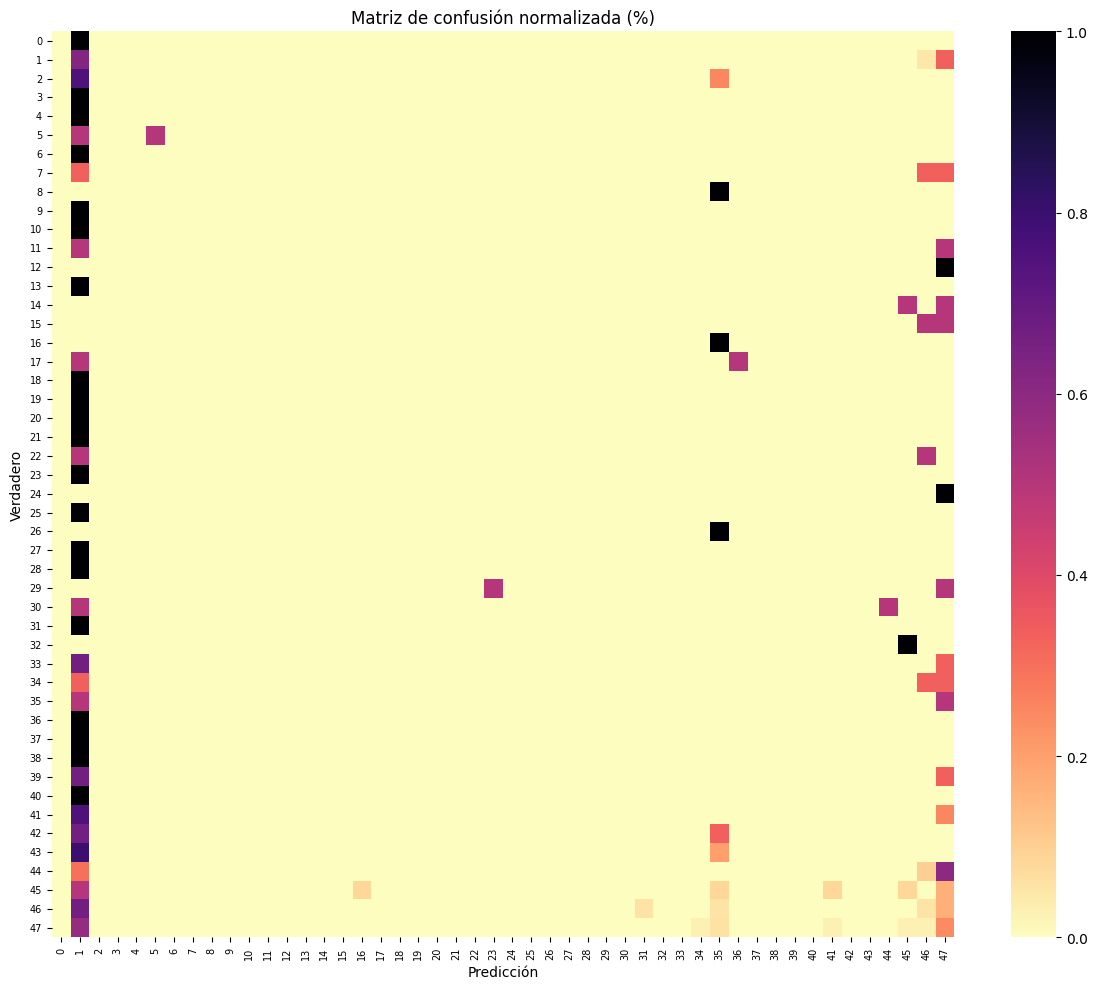

In [40]:
plt.figure(figsize=(12,10))
cmx_norm = cmx / cmx.sum(1, keepdims=True)
sns.heatmap(cmx_norm,
            annot=False,
            cmap='magma_r',
            vmin=0, vmax=1,
            xticklabels=labels, yticklabels=labels)

plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Matriz de confusión normalizada (%)')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.tight_layout()
plt.show()

Guardar modelo

In [43]:
joblib.dump(svm_lin, "svm_lineal.joblib")      # pesos + hiperparámetros

info = {
    "kernel": kernel,
    "C": C,
    "batch_size": 100,
    "scikit_version": joblib.__version__
}
with open("svm_lineal_meta.json", "w") as f:
    json.dump(info, f, indent=2)

# 📌 Naive Bayes Multinomial (Scikit-Learn)

- **Hiperparámetros**  
  - `alpha = 1.0` → suavizado Laplaciano.  
  - `fit_prior = True` → estima priors de clase automáticamente.  

- **Entrenamiento incremental** (`partial_fit`, `batch_size = 100`)  
  1. Divide `train_X` en lotes.  
  2. Llama `partial_fit(batch_X, batch_Y, classes=classes)` en cada lote.

- **Predicción** también por lotes para ahorrar RAM.


In [44]:

# Hiperparámetros del modelo Naive Bayes
params = {
    'alpha': 1.0,          # Parámetro de suavizado Laplaciano
    'fit_prior': True,     # Estimar las probabilidades previas de clase
    'class_prior': None    # Probabilidades previas de clase
}

# Número de lotes y tamaño del lote
batch_size = 100
num_batches = len(train_X) // batch_size
print("Número de lotes:", num_batches)

# Lista para almacenar los modelos entrenados
batch_models = []

# Se crea el modelo Naive Bayes una vez
naive_bayes = MultinomialNB(**params)

# Se entrena el modelo Naive Bayes en lotes
for i in range(num_batches):
    start = i * batch_size
    end = min(len(train_X), (i + 1) * batch_size)

    # Se obtiene el lote actual
    batch_X = train_X[start:end]
    batch_Y = train_Y[start:end]

    # Se entrena el modelo Naive Bayes con el lote actual
    naive_bayes.partial_fit(batch_X, batch_Y, classes=np.unique(train_Y))

    # Se agrega el modelo entrenado a la lista
    batch_models.append(naive_bayes)

# Se realizan predicciones en los datos de prueba
y_pred = []

for i in range(0, len(test_X), batch_size):
    batch_X_test = test_X[i:i+batch_size]

    # Se obtiene el modelo entrenado correspondiente al lote actual
    batch_naive_bayes = batch_models[i // batch_size]

    # Se realizan predicciones en el lote actual
    batch_Y_pred = batch_naive_bayes.predict(batch_X_test)

    # Se agregan las predicciones del lote actual a y_pred
    y_pred.extend(batch_Y_pred)

Número de lotes: 7


In [45]:
print(classification_report(
        test_Y,
        y_pred,
        labels=labels,
        target_names=names,
        digits=3
))

              precision    recall  f1-score   support

       cls_0      0.000     0.000     0.000         1
       cls_1      0.143     0.048     0.071        21
       cls_2      0.000     0.000     0.000         4
       cls_3      0.000     0.000     0.000         3
       cls_4      0.000     0.000     0.000         2
       cls_5      0.000     0.000     0.000         2
       cls_6      0.000     0.000     0.000         2
       cls_7      0.000     0.000     0.000         3
       cls_8      0.000     0.000     0.000         1
       cls_9      0.000     0.000     0.000         2
      cls_10      0.400     0.667     0.500         3
      cls_11      0.000     0.000     0.000         2
      cls_12      0.000     0.000     0.000         1
      cls_13      0.200     0.333     0.250         3
      cls_14      0.000     0.000     0.000         2
      cls_15      0.000     0.000     0.000         2
      cls_16      0.000     0.000     0.000         1
      cls_17      0.000    

In [46]:
accuracy = accuracy_score(test_Y, y_pred)
print("Precisión: %.2f%%" % (accuracy * 100.0))

Precisión: 5.91%


In [47]:
cmx = confusion_matrix(test_Y, y_pred)
cmx

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 1, 2, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 2, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       [1, 2, 2, ..., 1, 0, 4]])

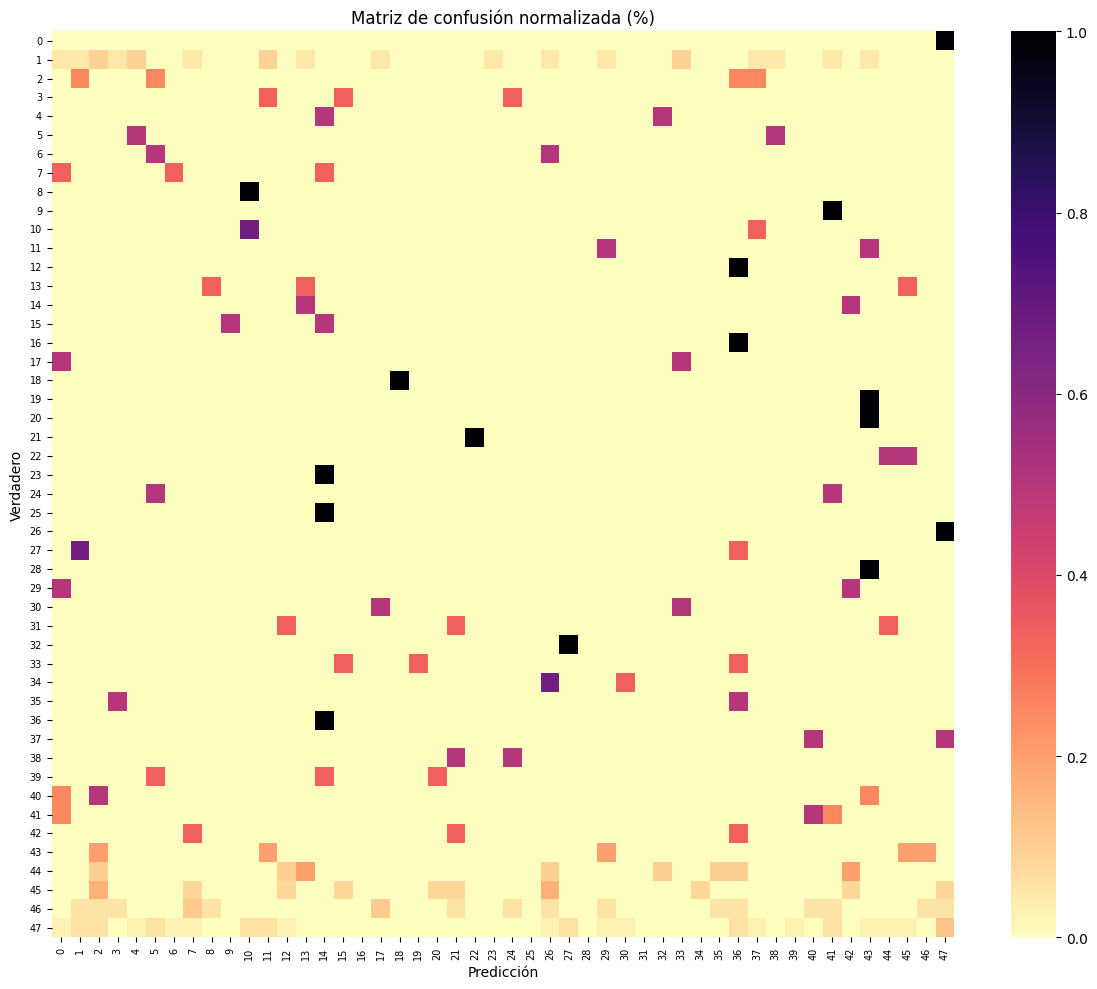

In [48]:
plt.figure(figsize=(12,10))
cmx_norm = cmx / cmx.sum(1, keepdims=True)
sns.heatmap(cmx_norm,
            annot=False,
            cmap='magma_r',
            vmin=0, vmax=1,
            xticklabels=labels, yticklabels=labels)

plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Matriz de confusión normalizada (%)')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.tight_layout()
plt.show()

In [49]:
joblib.dump(naive_bayes, "naive_bayes.joblib")

meta = {
    "alpha": params["alpha"],
    "fit_prior": params["fit_prior"],
    "batch_size": batch_size,
    "scikit_version": joblib.__version__
}
with open("naive_bayes_meta.json", "w") as f:
    json.dump(meta, f, indent=2)